# KEEP COMPONENT

In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np



import nltk
# Download 'stopwords' before using it.
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
nltk.download('punkt_tab')



from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


#Vader
import nltk
nltk.download( "vader_lexicon" )

#from vader sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# LOADING DATA AND DATA MAPPING

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
folder_path = '/content/drive/MyDrive/Colab Notebooks/Amdari Project/Project 1 (Sentiment Analysis)'
os.listdir(folder_path)


Mounted at /content/drive


['e commerce reviews test.csv',
 'e commerce reviews train.csv',
 'Sentiment Analysis.ipynb',
 '.ipynb_checkpoints',
 'logistic_regression_model.pkl',
 'tfidf_vectorizer.pkl',
 'Wrap_up.ipynb',
 'ope.py',
 'app.py',
 'Sentiment Analysis - II.ipynb']

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amdari Project/Project 1 (Sentiment Analysis)/e commerce reviews train.csv")
df_train.head()


,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amdari Project/Project 1 (Sentiment Analysis)/e commerce reviews test.csv")

df_test.head()

,labels,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [5]:
mapping  =  {
    "__label__1": "negative",
    "__label__2": "positive"
}

In [6]:
df_train['labels'] = df_train['labels'].map(mapping)
df_train.head()

,labels,text
0,positive,Stuning even for the non-gamer: This sound tra...
1,positive,The best soundtrack ever to anything.: I'm rea...
2,positive,Amazing!: This soundtrack is my favorite music...
3,positive,Excellent Soundtrack: I truly like this soundt...
4,positive,"Remember, Pull Your Jaw Off The Floor After He..."


In [7]:
df_test['labels'] = df_test['labels'].map(mapping)
df_test.head()

,labels,text
0,positive,Great CD: My lovely Pat has one of the GREAT v...
1,positive,One of the best game music soundtracks - for a...
2,negative,Batteries died within a year ...: I bought thi...
3,positive,"works fine, but Maha Energy is better: Check o..."
4,positive,Great for the non-audiophile: Reviewed quite a...


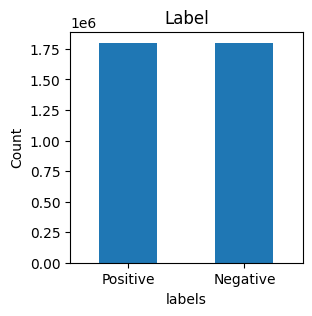

In [8]:
plt.figure(figsize = (3,3))
st = df_train['labels'].value_counts().plot(kind='bar')
st.set_ylabel('Count', size=10)
st.set_xticklabels(['Positive','Negative'], rotation=0)
st.set_title('Label');
plt.show()

In [9]:
df_train.labels.value_counts()

,count
labels,
positive,1800009
negative,1800001


# **REMOVING STOP WORDS**

In [10]:
#tokenization

def remove_stopwords(words):
     word = nltk.word_tokenize(words)
     new_word = [word for word in word if word not in stop_words]
     new_word = " ".join(new_word)
     return new_word

In [11]:
text = "i love this man JESUS, he saves me daily"
remove_stopwords(text)

'love man JESUS , saves daily'

In [12]:
df_train["text"].tail(10).apply(remove_stopwords)

,text
3600000,Buy CD 'll thank ! : Tyler Hilton .... name mi...
3600001,Tyler Rocks : one word describe tyler hilton-T...
3600002,AWESOME : Absolutely amazing relieving neck pa...
3600003,What A Slap In The Face To Masami Ueda : Do NO...
3600004,Too simplistic : While Mr. Harrison makes extr...
3600005,Do n't ! ! : The high chair looks great first ...
3600006,"Looks nice , low functionality : I used highch..."
3600007,"compact , hard clean : We small house , really..."
3600008,saying ? : sure book supposed . It really reha...
3600009,Makes My Blood Run Red-White-And-Blue : I agre...


In [13]:
total_rows = len(df_train)
tqdm.pandas(total = total_rows)
df_train["new_text"] = df_train["text"].progress_apply(remove_stopwords)

100%|██████████| 3600010/3600010 [47:32<00:00, 1262.00it/s]


In [14]:
df_train.head()

,labels,text,new_text
0,positive,Stuning even for the non-gamer: This sound tra...,Stuning even non-gamer : This sound track beau...
1,positive,The best soundtrack ever to anything.: I'm rea...,The best soundtrack ever anything . : I 'm rea...
2,positive,Amazing!: This soundtrack is my favorite music...,Amazing ! : This soundtrack favorite music tim...
3,positive,Excellent Soundtrack: I truly like this soundt...,Excellent Soundtrack : I truly like soundtrack...
4,positive,"Remember, Pull Your Jaw Off The Floor After He...","Remember , Pull Your Jaw Off The Floor After H..."


In [15]:
total_rows = len(df_test)
tqdm.pandas(total = total_rows)
df_test["new_text"] = df_test["text"].progress_apply(remove_stopwords)

100%|██████████| 400000/400000 [05:15<00:00, 1267.83it/s]


In [16]:
df_test.head()

,labels,text,new_text
0,positive,Great CD: My lovely Pat has one of the GREAT v...,Great CD : My lovely Pat one GREAT voices gene...
1,positive,One of the best game music soundtracks - for a...,One best game music soundtracks - game I n't r...
2,negative,Batteries died within a year ...: I bought thi...,Batteries died within year ... : I bought char...
3,positive,"works fine, but Maha Energy is better: Check o...","works fine , Maha Energy better : Check Maha E..."
4,positive,Great for the non-audiophile: Reviewed quite a...,Great non-audiophile : Reviewed quite bit comb...


# MODEL DEVELOPMENT

In [17]:
tf_vectorizer = TfidfVectorizer()
train_tf = tf_vectorizer.fit_transform(df_train['new_text'])
test_tf = tf_vectorizer.transform(df_test['new_text'])

In [18]:
#bag of words

vectorizer =  CountVectorizer()
train_bag = vectorizer.fit_transform(df_train['new_text'])
test_bag = vectorizer.transform(df_test['new_text'])

In [19]:
word_analyzer =  SentimentIntensityAnalyzer()

In [20]:
def sentence_analyzer(sentence):
    s_score = word_analyzer.polarity_scores(sentence)
    compound_score = s_score['compound']

    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'



In [21]:
def sentence_analyzer(sentence):
    s_score = word_analyzer.polarity_scores(sentence)
    compound_score = s_score['compound']

    if compound_score > 0:
        return 'positive'
    else:
        return 'negative'


In [22]:
#applying vader
df_train['vader_app'] = df_train['new_text'].apply(sentence_analyzer)
df_train.head()

,labels,text,new_text,vader_app
0,positive,Stuning even for the non-gamer: This sound tra...,Stuning even non-gamer : This sound track beau...,positive
1,positive,The best soundtrack ever to anything.: I'm rea...,The best soundtrack ever anything . : I 'm rea...,positive
2,positive,Amazing!: This soundtrack is my favorite music...,Amazing ! : This soundtrack favorite music tim...,positive
3,positive,Excellent Soundtrack: I truly like this soundt...,Excellent Soundtrack : I truly like soundtrack...,positive
4,positive,"Remember, Pull Your Jaw Off The Floor After He...","Remember , Pull Your Jaw Off The Floor After H...",positive


In [23]:
#applying vader
df_test['vader_app'] = df_test['new_text'].apply(sentence_analyzer)
df_test.head()

,labels,text,new_text,vader_app
0,positive,Great CD: My lovely Pat has one of the GREAT v...,Great CD : My lovely Pat one GREAT voices gene...,positive
1,positive,One of the best game music soundtracks - for a...,One best game music soundtracks - game I n't r...,positive
2,negative,Batteries died within a year ...: I bought thi...,Batteries died within year ... : I bought char...,positive
3,positive,"works fine, but Maha Energy is better: Check o...","works fine , Maha Energy better : Check Maha E...",positive
4,positive,Great for the non-audiophile: Reviewed quite a...,Great non-audiophile : Reviewed quite bit comb...,positive


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [25]:
classifier_bow = MultinomialNB()
classifier_tfids = MultinomialNB()

## fitting the model
classifier_bow.fit(train_bag,df_train["labels"])
classifier_tfids.fit(train_tf,df_train["labels"])


df_test['bag'] =  classifier_bow.predict(test_bag)
df_test['tf'] =  classifier_tfids.predict(test_tf)

df_test.head()


,labels,text,new_text,vader_app,bag,tf
0,positive,Great CD: My lovely Pat has one of the GREAT v...,Great CD : My lovely Pat one GREAT voices gene...,positive,positive,positive
1,positive,One of the best game music soundtracks - for a...,One best game music soundtracks - game I n't r...,positive,positive,positive
2,negative,Batteries died within a year ...: I bought thi...,Batteries died within year ... : I bought char...,positive,negative,negative
3,positive,"works fine, but Maha Energy is better: Check o...","works fine , Maha Energy better : Check Maha E...",positive,negative,negative
4,positive,Great for the non-audiophile: Reviewed quite a...,Great non-audiophile : Reviewed quite bit comb...,positive,positive,positive


In [26]:
lr_tfidf = LogisticRegression()
lr_bow = LogisticRegression()
## fitting the model

lr_tfidf.fit(train_tf,df_train["labels"])
lr_bow.fit(train_tf,df_train["labels"])

df_test['lr_tf'] = lr_tfidf.predict(test_tf)
df_test['lr_bow'] = lr_bow.predict(test_bag)

df_test.head()




,labels,text,new_text,vader_app,bag,tf,lr_tf,lr_bow
0,positive,Great CD: My lovely Pat has one of the GREAT v...,Great CD : My lovely Pat one GREAT voices gene...,positive,positive,positive,positive,positive
1,positive,One of the best game music soundtracks - for a...,One best game music soundtracks - game I n't r...,positive,positive,positive,positive,positive
2,negative,Batteries died within a year ...: I bought thi...,Batteries died within year ... : I bought char...,positive,negative,negative,negative,negative
3,positive,"works fine, but Maha Energy is better: Check o...","works fine , Maha Energy better : Check Maha E...",positive,negative,negative,positive,positive
4,positive,Great for the non-audiophile: Reviewed quite a...,Great non-audiophile : Reviewed quite bit comb...,positive,positive,positive,positive,positive


In [27]:
batch_size = 50000  # Adjust based on available memory
classes = np.unique(df_train["labels"])  # Ensure all classes are seen during training

# Use SGDClassifier to mimic SVC(kernel='linear')
rf_bow = SGDClassifier(loss="hinge", random_state=42)  # Hinge loss = SVM
rf_tfidf = SGDClassifier(loss="hinge", random_state=42)



# Train in batches
for i in range(0, len(df_train), batch_size):
    batch_end = i + batch_size
    train_batch_bow = train_bag[i:batch_end]
    train_batch_tf = train_tf[i:batch_end]
    label_batch = df_train["labels"].iloc[i:batch_end]

    if i == 0:
        # First batch initializes the model
        rf_bow.partial_fit(train_batch_bow, label_batch, classes=classes)
        rf_tfidf.partial_fit(train_batch_tf, label_batch, classes=classes)
    else:
        # Continue updating the model with new batches
        rf_bow.partial_fit(train_batch_bow, label_batch)
        rf_tfidf.partial_fit(train_batch_tf, label_batch)

# Predict on test set
df_test['rf_bow'] = rf_bow.predict(test_bag)
df_test['rf_tfidf'] = rf_tfidf.predict(test_bag)

df_test.head()


,labels,text,new_text,vader_app,bag,tf,lr_tf,lr_bow,rf_bow,rf_tfidf
0,positive,Great CD: My lovely Pat has one of the GREAT v...,Great CD : My lovely Pat one GREAT voices gene...,positive,positive,positive,positive,positive,positive,positive
1,positive,One of the best game music soundtracks - for a...,One best game music soundtracks - game I n't r...,positive,positive,positive,positive,positive,positive,positive
2,negative,Batteries died within a year ...: I bought thi...,Batteries died within year ... : I bought char...,positive,negative,negative,negative,negative,negative,negative
3,positive,"works fine, but Maha Energy is better: Check o...","works fine , Maha Energy better : Check Maha E...",positive,negative,negative,positive,positive,positive,positive
4,positive,Great for the non-audiophile: Reviewed quite a...,Great non-audiophile : Reviewed quite bit comb...,positive,positive,positive,positive,positive,positive,positive


# MODEL EVALUATION & SELECTION

SGDClassifier FOR TFIDF & BOW

In [28]:
sgdc_ac =accuracy_score(df_test['labels'],df_test['rf_tfidf'])
print('SGDClassifier score:', sgdc_ac*100)

SGDClassifier score: 86.46925


In [29]:
sgdc_report = classification_report(df_test['labels'],df_test['rf_tfidf'])
print(sgdc_report)

              precision    recall  f1-score   support

    negative       0.90      0.83      0.86    200000
    positive       0.84      0.90      0.87    200000

    accuracy                           0.86    400000
   macro avg       0.87      0.86      0.86    400000
weighted avg       0.87      0.86      0.86    400000



In [30]:
sgdc_ac_bow =accuracy_score(df_test['labels'],df_test['rf_bow'])
print('SGDClassifier BOW score:', sgdc_ac_bow*100)

SGDClassifier BOW score: 89.97625000000001


In [31]:
sgdc_report_bow = classification_report(df_test['labels'],df_test['rf_bow'])
print(sgdc_report_bow)

              precision    recall  f1-score   support

    negative       0.90      0.90      0.90    200000
    positive       0.90      0.90      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



LogisticRegression FOR TFIDF & BOW

In [32]:
lr_ac =accuracy_score(df_test['labels'],df_test['lr_tf'])
print('LogisticRegression score:', lr_ac*100)

LogisticRegression score: 90.50975


In [33]:
lr_report = classification_report(df_test['labels'],df_test['lr_tf'])
print(lr_report)

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90    200000
    positive       0.90      0.91      0.91    200000

    accuracy                           0.91    400000
   macro avg       0.91      0.91      0.91    400000
weighted avg       0.91      0.91      0.91    400000



In [34]:
lr_ac_bow =accuracy_score(df_test['labels'],df_test['lr_bow'])
print('LogisticRegression BOW score:', sgdc_ac_bow*100)

LogisticRegression BOW score: 89.97625000000001


In [35]:
lr_report_bow = classification_report(df_test['labels'],df_test['lr_bow'])
print(lr_report_bow)

              precision    recall  f1-score   support

    negative       0.93      0.84      0.88    200000
    positive       0.85      0.94      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000



MultinomialNB FOR TFIDF & BOW

In [36]:
mnb_ac =accuracy_score(df_test['labels'],df_test['tf'])
print('MultinomialNB score:', mnb_ac*100)

MultinomialNB score: 84.68525


In [37]:
mnb_report = classification_report(df_test['labels'],df_test['tf'])
print(mnb_report)

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85    200000
    positive       0.86      0.83      0.84    200000

    accuracy                           0.85    400000
   macro avg       0.85      0.85      0.85    400000
weighted avg       0.85      0.85      0.85    400000



In [38]:
mnb_ac_bow =accuracy_score(df_test['labels'],df_test['bag'])
print('MultinomialNB BOW score:', mnb_ac_bow*100)

MultinomialNB BOW score: 85.3445


In [39]:
mnb_report_bow = classification_report(df_test['labels'],df_test['bag'])
print(mnb_report_bow)

              precision    recall  f1-score   support

    negative       0.85      0.86      0.85    200000
    positive       0.86      0.84      0.85    200000

    accuracy                           0.85    400000
   macro avg       0.85      0.85      0.85    400000
weighted avg       0.85      0.85      0.85    400000



USING VADER

In [40]:
v_ac = accuracy_score(df_test['labels'],df_test['vader_app'])
print('Vader score:', v_ac*100)

Vader score: 69.269


In [41]:
v_report = classification_report(df_test['labels'],df_test['vader_app'])
print(v_report)

              precision    recall  f1-score   support

    negative       0.87      0.45      0.60    200000
    positive       0.63      0.93      0.75    200000

    accuracy                           0.69    400000
   macro avg       0.75      0.69      0.67    400000
weighted avg       0.75      0.69      0.67    400000



In [42]:
best_model = max(sgdc_ac,lr_ac,mnb_ac,v_ac)
print(best_model)

0.9050975


In [43]:
"""
This shows that the Logistics Regression applied on the TFIDF had the best accuracy
"""

'\nThis shows that the Logistics Regression applied on the TFIDF had the best accuracy\n'

# WRAP UP

In [44]:
def final_model(text):

    cleaned_text = remove_stopwords(text)
    transformed_text = tf_vectorizer.transform([cleaned_text])
    sentiment = lr_tfidf.predict(transformed_text)

    return sentiment




In [45]:
import joblib

In [46]:
#using the logis regression model
joblib.dump(lr_tfidf,'logistic_regression_model.pkl')

# Save the vectorizer
joblib.dump(tf_vectorizer, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [52]:
!pip install streamlit
!pip install pyngrok

In [56]:
%%writefile app.py

import streamlit as st
import joblib

tf_vectorizer = joblib.load("vectorizer.pkl")
model = joblib.load("logistic_regression_model.pkl")

# Function to predict sentiment
def predict_sentiment(text):
    cleaned_text = text
    transformed_text = tf_vectorizer.transform([cleaned_text])
    prediction = model.predict(transformed_text)
    return prediction[0].upper()

# Streamlit UI
st.title("Sentiment Analysis Web App")
st.write("Enter a review below to analyze its sentiment.")

# User input text
user_input = st.text_area("Enter your text here:")

# Predict sentiment on button click
if st.button("Analyze Sentiment"):
    if user_input.strip():
        result = predict_sentiment(user_input)
        st.write(f"### Sentiment: {result}")
    else:
        st.warning("Please enter some text to analyze.")

Writing app.py


In [54]:
from pyngrok import ngrok

# Start Streamlit in the background
!streamlit run /content/drive/MyDrive/Colab\ Notebooks/Amdari\ Project/Project\ 1\ \(Sentiment\ Analysis\)/app.py --server.port 8501 &

# Set up ngrok tunnel
public_url = ngrok.connect(port='8501')
print("Streamlit app is running at:", public_url)




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.31.227:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2025-02-21T05:46:41+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-21T05:46:41+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-21T05:46:41+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.